In [1]:
import glob
import os
import pickle
import numpy

import time

import pandas as pd

In [2]:
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", 500)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
DATA_PATH="data/"

### Read processed RAG results

In [5]:
with open(DATA_PATH + "passage_paths_teste_normas_new_full_20250122_114126.pkl", "rb") as input_file:
    new_segmentation_processed = pickle.load(input_file)

### Read the complete list of references

In [18]:
with open(DATA_PATH + "llama_deduplicated_embedded_and_annotated_reference_titles_20250214_fixed_after_match.pkl", "rb") as input_file:
    final_deduplicated_references_list = pickle.load(input_file)

In [19]:
final_deduplicated_references_list

array(['AD PGFN nº 3 de 18 de setembro de 2008', 'ADI RFB nº 12, de 2016',
       'Acordo para Evitar a Dupla Tributação em Matéria de Impostos sobre a Renda e o Capital firmado entre o Brasil e a Alemanha',
       'Acórdão do RE nº 855.091/RS (Tema 808)',
       'Anexo ao Decreto nº 361, de 10 de dezembro de 1991',
       'Ato Declaratório (AD) PGFN nº 3, de 18 de setembro de 2008',
       'Ato Declaratório Cosar nº 47, de 27 de novembro de 2000',
       'Ato Declaratório Executivo Codac nº 23, de 4 de dezembro de 2019',
       'Ato Declaratório Executivo RFB nº 2, de 6 de março de 2024',
       'Ato Declaratório Executivo SRF nº 72, de 22 de dezembro de 2005',
       'Ato Declaratório Interpretativo RFB nº 1, de 18 de janeiro de 2016',
       'Ato Declaratório Interpretativo RFB nº 18, de 6 de dezembro de 2007',
       'Ato Declaratório Interpretativo RFB nº 3, de 27 de abril de 2016',
       'Ato Declaratório Interpretativo SRF nº 14, de 1º de dezembro de 2005',
       'Ato Declarat

#### Remove first entry which is a duplicate of the 6th one.

In [20]:
final_deduplicated_references_list = final_deduplicated_references_list[1:]

In [21]:
final_deduplicated_references_list.shape

(480,)

In [23]:
with open(DATA_PATH + "llama_deduplicated_embedded_and_annotated_reference_titles_20250217_remove_last_dup.pkl", "wb") as output_file:
    pickle.dump(final_deduplicated_references_list, output_file, pickle.HIGHEST_PROTOCOL)

### Read the extracted references filename to final references list convertion

In [6]:
with open(DATA_PATH + "extracted_reference_match_results_20250214.pkl", "rb") as input_file:
    references = pickle.load(input_file)

In [7]:
references.keys()

dict_keys(['exact_matches', 'multiple_matches', 'file_to_reference', 'already_extracted', 'still_to_extract'])

In [9]:
references['file_to_reference']

{'Ato Declaratório Cosar nº 47.txt': 'Ato Declaratório Cosar nº 47, de 27 de novembro de 2000',
 'Ato Declaratório Interpretativo RFB nº 1.txt': 'Ato Declaratório Interpretativo RFB nº 1, de 18 de janeiro de 2016',
 'Ato Declaratório Interpretativo SRF nº 2.txt': 'Ato Declaratório Interpretativo SRF nº 2, de 27 de março de 2007',
 'Ato Declaratório Interpretativo SRF nº 24.txt': 'Ato Declaratório Interpretativo SRF nº 24, de 4 de outubro de 2004',
 'Ato Declaratório Interpretativo SRF nº 5.txt': 'Ato Declaratório Interpretativo SRF nº 5, de 27 de abril de 2005',
 'Ato Declaratório PGFN nº 13.txt': 'Ato Declaratório PGFN Nº 13, de 20 de dezembro de 2011',
 'Ato Declaratório PGFN nº 14.txt': 'Ato Declaratório PGFN Nº 14, de 1º de dezembro de 2008',
 'Ato Declaratório PGFN nº 2.txt': 'Ato Declaratório PGFN Nº 2, de 10 de março de 2016',
 'Ato Declaratório PGFN nº 3.txt': 'Ato Declaratório PGFN nº 3, de 30 de março de 2016',
 'Ato Declaratório PGFN nº 6 DE 2006.txt': 'Ato Declaratório PGFN

### Read final list of Q&A document data

In [5]:
with open(DATA_PATH + "extracted_questions_with_embedded_references_20250212_final.pkl", "rb") as input_file:
    questions = pickle.load(input_file)

In [6]:
len(questions)

715

In [12]:
questions[504]

{'question_number': '505',
 'question_summary': 'VENDA DE REBANHO BOVINO - GANHO DE CAPITAL',
 'question_text': 'A receita auferida na venda de rebanho bovino anteriormente comprado, com permanência dias nos demais casos, é tributada na atividade rural?',
 'answer': ['Não. O tratamento tributário é o seguinte:',
  '1 - os rendimentos auferidos, na venda, são tributados como ganho de capital, se essa atividade não for',
  'exercida com habitualidade (Lei nº 7.713, de 1988, art. 3º, § 2º); ou',
  '2 - se houver habitualidade e fim especulativo de lucro, a pessoa física é considerada empresário (empresa',
  'individual) equiparado a pessoa jurídica, sendo seus lucros tributados nessa condição (Regulamento do',
  'Imposto sobre a Renda – RIR/2018, arts. 162, 623 e 624, aprovado pelo Decreto nº 9.580, de 22 de novembro',
  'de 2018).',
  '(Instrução Normativa SRF nº 83, de 11 de outubro de 2001, art. 4º, inciso II; e Solução de Consulta',
  'Cosit nº 147, de 24 de setembro de 2018)'],
 'ans

In [15]:
questions[0].keys()

dict_keys(['question_number', 'question_summary', 'question_text', 'answer', 'answer_cleaned', 'references', 'linked_questions', 'formatted_references', 'embedded_references', 'formatted_embedded_references'])

In [16]:
questions[0]['formatted_references']

[{'título': 'Lei nº 9.250, de 26 de dezembro de 1995',
  'artigos': [{'artigo': '25', 'incisos': [], 'parágrafos': []}]},
 {'título': 'Lei nº 9.779, de 19 de janeiro de 1999',
  'artigos': [{'artigo': '16', 'incisos': [], 'parágrafos': []}]},
 {'título': 'Lei nº 11.482, de 31 de maio de 2007',
  'artigos': [{'artigo': '1º', 'incisos': ['X'], 'parágrafos': ['único']}]},
 {'título': 'Lei nº 14.754, de 12 de dezembro de 2023',
  'artigos': [{'artigo': '8º', 'incisos': [], 'parágrafos': []},
   {'artigo': '11', 'incisos': [], 'parágrafos': []},
   {'artigo': '14', 'incisos': [], 'parágrafos': []}]},
 {'título': 'Instrução Normativa RFB nº 2.178, de 5 de março de 2024',
  'artigos': [{'artigo': '2º', 'incisos': [], 'parágrafos': []}]},
 {'título': 'Instrução Normativa RFB nº 2.180, de 11 de março de 2024',
  'artigos': [],
  'anexos': []}]

In [17]:
questions[0]['formatted_embedded_references']

[{'título': 'Lei nº 11.196, de 21 de novembro de 2005',
  'artigos': [{'artigo': '39', 'incisos': [], 'parágrafos': []}],
  'anexos': []},
 {'título': 'Lei nº 14.754, de 12 de dezembro de 2023',
  'artigos': [{'artigo': '8', 'incisos': [], 'parágrafos': []}],
  'anexos': []},
 {'título': 'Lei nº 14.754, de 2023',
  'artigos': [{'artigo': '10 a 13', 'incisos': [], 'parágrafos': []}],
  'anexos': []},
 {'título': 'Lei nº 14.754, de 2023',
  'artigos': [{'artigo': '14', 'incisos': [], 'parágrafos': []}],
  'anexos': []},
 {'título': 'Instrução Normativa RFB nº 2.180, de 11 de março de 2024',
  'artigos': [{'artigo': '36', 'incisos': [], 'parágrafos': []}],
  'anexos': []},
 {'título': 'Instrução Normativa RFB nº 2.180, de 2024',
  'artigos': [{'artigo': '41 a 47', 'incisos': [], 'parágrafos': []}],
  'anexos': []},
 {'título': 'Instrução Normativa RFB nº 2.180, de 2024',
  'artigos': [{'artigo': '48 a 56', 'incisos': [], 'parágrafos': []}],
  'anexos': []}]

In [73]:
from references_normalization import *

In [74]:
doc_matcher = legalDocumentsMatcher(DATA_PATH + "llama_deduplicated_embedded_and_annotated_reference_titles_20250217_remove_last_dup.pkl")

### Check the matches on the Q&A references, just to confirm

In [111]:
def check_question_reference_matches(question, which_field, question_references_dict, multiple_matches_list):
    if question[which_field] is not None:
        for i, reference in enumerate(question[which_field]):
            if 'título' in reference:
                reference_matches = doc_matcher.get_best_match(reference['título'])
        
                if len(reference_matches['best_matches']) == 1:
                    if reference_matches['best_matches'][0] not in question_references_dict['references']:
                        question_references_dict['references'][reference_matches['best_matches'][0]] = []
        
                    question_references_dict['references'][reference_matches['best_matches'][0]].append(reference)
                else:
                    print(f">>{question_references_dict['question_number']}, {which_field} item {i} multiple matches: {reference_matches}\n")
                    multiple_matches_list.append({
                        'question_number': question_references_dict['question_number'],
                        'reference_field': which_field,
                        'reference_item': i,
                        'reference_title': reference['título'],
                        'reference_matches': reference_matches['best_matches']
                    })
            else:
                print(f">> Missing reference title in entry {i}: {reference}")

In [82]:
matches = []

multiple_matches = []

for i, question in enumerate(questions):
    print(f"Handling question entry {i}")
    question_references = {}
    question_references['question_number'] = int(question['question_number'])
    question_references['references'] = {}

    check_question_reference_matches(question, 'formatted_references', question_references, multiple_matches)    
    check_question_reference_matches(question, 'formatted_embedded_references', question_references, multiple_matches)

    matches.append(question_references)

Handling question entry 0
Handling question entry 1
Handling question entry 2
Handling question entry 3
Handling question entry 4
Handling question entry 5
Handling question entry 6
Handling question entry 7
Handling question entry 8
Handling question entry 9
Handling question entry 10
Handling question entry 11
Handling question entry 12
Handling question entry 13
Handling question entry 14
Handling question entry 15
Handling question entry 16
Handling question entry 17
Handling question entry 18
Handling question entry 19
Handling question entry 20
Handling question entry 21
Handling question entry 22
Handling question entry 23
Handling question entry 24
Handling question entry 25
Handling question entry 26
Handling question entry 27
Handling question entry 28
>>29, formatted_references item 4 multiple matches: {'title_f1': 0.4, 'number_f1': 0, 'date_f1': 0, 'best_matches': ['Súmula nº 136 do Superior Tribunal de Justiça (STJ)', 'Lei nº 6.015, de 31 de dezembro de 1973', 'Lei nº 4.50

In [83]:
multiple_matches

[{'question_number': 29,
  'reference_field': 'formatted_embedded_references',
  'reference_item': 4,
  'reference_title': 'e-Financeira',
  'reference_matches': ['Súmula nº 136 do Superior Tribunal de Justiça (STJ)',
   'Lei nº 6.015, de 31 de dezembro de 1973',
   'Lei nº 4.506, de 30 de novembro de 1964',
   'Lei nº 4.591, de 16 de dezembro de 1964',
   'Lei nº 4.862, de 29 de novembro de 1965',
   'Lei nº 4.886, de 9 de dezembro de 1965',
   'Lei nº 5.172, de 25 de outubro de 1966 - Código Tributário Nacional (CTN)',
   'Lei nº 5.809, de 10 de outubro de 1972',
   'Lei nº 6.404, de 15 de dezembro de 1976',
   'Lei nº 4.242, de 1963',
   'Lei nº 6.766, de 19 de dezembro de 1979',
   'Lei nº 7.070, de 20 de dezembro de 1982',
   'Lei nº 7.290, de 19 de dezembro de 1984',
   'Lei nº 7.713, de 22 de dezembro de 1988',
   'Súmula nº 125 do Superior Tribunal de Justiça (STJ)',
   'Lei nº 8.023, de 12 de abril de 1990',
   'Lei nº 4.504, de 30 de novembro de 1964',
   'Lei nº 2.579, de 23

### Manually fixing the match issues in the Q&A document

Remove the "e-Financeira" reference.

In [113]:
questions[28]['formatted_embedded_references'].pop(4)

{'título': 'e-Financeira', 'artigos': [], 'anexos': []}

In [114]:
questions[28]['formatted_embedded_references']

[{'título': 'Declaração do Imposto sobre a Renda Retido na Fonte (Dirf)',
  'artigos': [],
  'anexos': []},
 {'título': 'Declaração de Serviços Médicos e de Saúde (Dmed)',
  'artigos': [],
  'anexos': []},
 {'título': 'Declaração de informações sobre Atividades Imobiliárias (Dimob)',
  'artigos': [],
  'anexos': []},
 {'título': 'Sistema de Recolhimento Mensal Obrigatório (Carnê-Leão)',
  'artigos': [],
  'anexos': []},
 {'título': 'Declaração sobre Operações Imobiliárias (DOI)',
  'artigos': [],
  'anexos': []},
 {'título': 'Declaração de Benefícios Fiscais (DFB)',
  'artigos': [],
  'anexos': []},
 {'título': 'Instrução Normativa RFB nº 1.888, de 3 de maio de 2019',
  'artigos': [],
  'anexos': []}]

The following items also don't correspond to a proper reference and shall be removed:

1. 'Declaração do Imposto sobre a Renda Retido na Fonte (Dirf)'
1. 'Declaração de Serviços Médicos e de Saúde (Dmed)'
1. 'Declaração de informações sobre Atividades Imobiliárias (Dimob)'
1. 'Sistema de Recolhimento Mensal Obrigatório (Carnê-Leão)'
1. 'Declaração sobre Operações Imobiliárias (DOI)'
1. 'Declaração de Benefícios Fiscais (DFB)'

In [116]:
questions[28]['formatted_embedded_references'] = questions[28]['formatted_embedded_references'][-1:]

In [117]:
questions[28]['formatted_embedded_references']

[{'título': 'Instrução Normativa RFB nº 1.888, de 3 de maio de 2019',
  'artigos': [],
  'anexos': []}]

Fix the missing 'título' field, wrongly named 'tjomais'.

In [103]:
questions[140]['formatted_embedded_references']

[{'título': 'Acordo para Evitar a Dupla Tributação em Matéria de Impostos sobre a Renda e o Capital firmado entre o Brasil e a Alemanha',
  'artigos': [],
  'anexos': []},
 {'título': 'Ato Declaratório Interpretativo SRF nº 16, de 22 de dezembro de 2005',
  'artigos': [],
  'anexos': []},
 {'tjomais': 'Instrução Normativa SRF nº 208, de 27 de setembro de 2002',
  'artigos': [{'artigo': '15', 'incisos': [], 'parágrafos': ['1º']},
   {'artigo': '16', 'incisos': [], 'parágrafos': ['1º', '2º', '6º']}],
  'anexos': []}]

In [106]:
questions[140]['formatted_embedded_references'][2]['título'] = questions[140]['formatted_embedded_references'][2]['tjomais']

In [108]:
questions[140]['formatted_embedded_references'][2].pop('tjomais')

'Instrução Normativa SRF nº 208, de 27 de setembro de 2002'

In [109]:
questions[140]['formatted_embedded_references'][2]

{'artigos': [{'artigo': '15', 'incisos': [], 'parágrafos': ['1º']},
  {'artigo': '16', 'incisos': [], 'parágrafos': ['1º', '2º', '6º']}],
 'anexos': [],
 'título': 'Instrução Normativa SRF nº 208, de 27 de setembro de 2002'}

Remove 'e-CAC' reference.

In [118]:
questions[459]['formatted_references']

[{'título': 'Lei nº 9.250, de 26 de dezembro de 1995',
  'artigos': [{'artigo': '25', 'incisos': ['II'], 'parágrafos': ['1º']}]},
 {'título': 'Instrução Normativa RFB nº 1.888, de 3 de maio de 2019',
  'artigos': [],
  'anexos': []},
 {'título': 'Instrução Normativa RFB nº 2.178, de 5 de março de 2024',
  'artigos': [{'artigo': '11', 'incisos': ['II'], 'parágrafos': ['2º']}]},
 {'título': 'Ato Declaratório Executivo Codac nº 23, de 4 de dezembro de 2019',
  'artigos': [],
  'anexos': []},
 {'título': 'Solução de Consulta Cosit nº 214, de 20 de dezembro de 2021',
  'artigos': [],
  'anexos': []},
 {'título': 'Solução de Consulta Cosit nº 217, de 21 de setembro de 2023',
  'artigos': [],
  'anexos': []},
 {'título': 'Solução de Consulta Cosit nº 218, de 21 de setembro de 2023',
  'artigos': [],
  'anexos': []},
 {'título': 'e-CAC', 'artigos': [], 'anexos': []}]

In [120]:
questions[459]['formatted_references'] = questions[459]['formatted_references'][:-1]

In [121]:
questions[459]['formatted_references']

[{'título': 'Lei nº 9.250, de 26 de dezembro de 1995',
  'artigos': [{'artigo': '25', 'incisos': ['II'], 'parágrafos': ['1º']}]},
 {'título': 'Instrução Normativa RFB nº 1.888, de 3 de maio de 2019',
  'artigos': [],
  'anexos': []},
 {'título': 'Instrução Normativa RFB nº 2.178, de 5 de março de 2024',
  'artigos': [{'artigo': '11', 'incisos': ['II'], 'parágrafos': ['2º']}]},
 {'título': 'Ato Declaratório Executivo Codac nº 23, de 4 de dezembro de 2019',
  'artigos': [],
  'anexos': []},
 {'título': 'Solução de Consulta Cosit nº 214, de 20 de dezembro de 2021',
  'artigos': [],
  'anexos': []},
 {'título': 'Solução de Consulta Cosit nº 217, de 21 de setembro de 2023',
  'artigos': [],
  'anexos': []},
 {'título': 'Solução de Consulta Cosit nº 218, de 21 de setembro de 2023',
  'artigos': [],
  'anexos': []}]

Fix the last embedded reference, which implicitly refers to the law number present in the question, but not in the answer.

In [122]:
questions[516]['formatted_embedded_references']

[{'título': 'Lei',
  'artigos': [{'artigo': '3º', 'incisos': ['III'], 'parágrafos': ['1º']}],
  'anexos': []}]

In [124]:
questions[516]['formatted_embedded_references'][0]['título']

'Lei'

In [126]:
questions[516]['formatted_embedded_references'][0]['título'] = 'Lei nº 11.524, de 24 de setembro de 2007'

In [127]:
questions[516]['formatted_embedded_references']

[{'título': 'Lei nº 11.524, de 24 de setembro de 2007',
  'artigos': [{'artigo': '3º', 'incisos': ['III'], 'parágrafos': ['1º']}],
  'anexos': []}]

#### Save the fixed questions version

In [128]:
with open(DATA_PATH + "extracted_questions_with_embedded_references_20250217_final_match_fixes.pkl", "wb") as output_file:
    pickle.dump(questions, output_file, pickle.HIGHEST_PROTOCOL)

### Rerun the reference matches against the questions

In [129]:
matches = []

multiple_matches = []

for i, question in enumerate(questions):
    print(f"Handling question entry {i}")
    question_references = {}
    question_references['question_number'] = int(question['question_number'])
    question_references['references'] = {}

    check_question_reference_matches(question, 'formatted_references', question_references, multiple_matches)    
    check_question_reference_matches(question, 'formatted_embedded_references', question_references, multiple_matches)

    matches.append(question_references)

Handling question entry 0
Handling question entry 1
Handling question entry 2
Handling question entry 3
Handling question entry 4
Handling question entry 5
Handling question entry 6
Handling question entry 7
Handling question entry 8
Handling question entry 9
Handling question entry 10
Handling question entry 11
Handling question entry 12
Handling question entry 13
Handling question entry 14
Handling question entry 15
Handling question entry 16
Handling question entry 17
Handling question entry 18
Handling question entry 19
Handling question entry 20
Handling question entry 21
Handling question entry 22
Handling question entry 23
Handling question entry 24
Handling question entry 25
Handling question entry 26
Handling question entry 27
Handling question entry 28
Handling question entry 29
Handling question entry 30
Handling question entry 31
Handling question entry 32
Handling question entry 33
Handling question entry 34
Handling question entry 35
Handling question entry 36
Handling qu

In [130]:
multiple_matches

[]

In [131]:
len(matches)

715

In [132]:
matches[0]

{'question_number': 1,
 'references': {'Lei nº 9.250, de 26 de dezembro de 1995': [{'título': 'Lei nº 9.250, de 26 de dezembro de 1995',
    'artigos': [{'artigo': '25', 'incisos': [], 'parágrafos': []}]}],
  'Lei nº 9.779, de 19 de janeiro de 1999': [{'título': 'Lei nº 9.779, de 19 de janeiro de 1999',
    'artigos': [{'artigo': '16', 'incisos': [], 'parágrafos': []}]}],
  'Lei nº 11.482, de 31 de maio de 2007': [{'título': 'Lei nº 11.482, de 31 de maio de 2007',
    'artigos': [{'artigo': '1º', 'incisos': ['X'], 'parágrafos': ['único']}]}],
  'Lei nº 14.754, de 12 de dezembro de 2023': [{'título': 'Lei nº 14.754, de 12 de dezembro de 2023',
    'artigos': [{'artigo': '8º', 'incisos': [], 'parágrafos': []},
     {'artigo': '11', 'incisos': [], 'parágrafos': []},
     {'artigo': '14', 'incisos': [], 'parágrafos': []}]},
   {'título': 'Lei nº 14.754, de 12 de dezembro de 2023',
    'artigos': [{'artigo': '8', 'incisos': [], 'parágrafos': []}],
    'anexos': []},
   {'título': 'Lei nº 14

In [135]:
with open(DATA_PATH + "question_references_matches_20250217.pkl", "wb") as output_file:
    pickle.dump(matches, output_file, pickle.HIGHEST_PROTOCOL)

## Match the returned RAG context against the annotated references for each question

In [139]:
with open(DATA_PATH + "passage_paths_teste_normas_new_full_20250122_114126.pkl", "rb") as input_file:
    new_segmentation_full_rag = pickle.load(input_file)

In [140]:
len(new_segmentation_full_rag)

1731

In [142]:
new_segmentation_full_rag[0:5]

[{'question': 1,
  'path': 'Lei nº 13.254_Art. 4º_§ 2º',
  'nome': 'Lei nº 13.254',
  'livro': '',
  'título': '',
  'capítulo': '',
  'seção': '',
  'subseção': '',
  'artigo': '4',
  'parágrafo': '2',
  'inciso': ''},
 {'question': 1,
  'path': 'Instrução Normativa RFB nº 1.704_CAPÍTULO II_Seção IV_Art. 19.',
  'nome': 'Instrução Normativa RFB nº 1.704',
  'livro': '',
  'título': '',
  'capítulo': ' II',
  'seção': 'IV',
  'subseção': '',
  'artigo': '19',
  'parágrafo': '',
  'inciso': ''},
 {'question': 1,
  'path': 'RIR2018_LIVRO II_TÍTULO VIII_CAPÍTULO XI_Art. 557._preamble',
  'nome': 'RIR2018',
  'livro': 'II',
  'título': 'VIII',
  'capítulo': ' XI',
  'seção': '',
  'subseção': '',
  'artigo': '557',
  'parágrafo': '',
  'inciso': ''},
 {'question': 2,
  'path': 'Lei nº 13.254_Art. 4º_§ 2º',
  'nome': 'Lei nº 13.254',
  'livro': '',
  'título': '',
  'capítulo': '',
  'seção': '',
  'subseção': '',
  'artigo': '4',
  'parágrafo': '2',
  'inciso': ''},
 {'question': 2,
  'pat

In [187]:
from context_matching import *

In [190]:
context_matches_new_df = count_rag_matches(new_segmentation_full_rag, matches, references['file_to_reference'])

count    577.000000
mean       0.282889
std        0.371897
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: correct_ratio, dtype: float64


count    577.000000
mean       0.712638
std        0.356928
min        0.000000
25%        0.400000
50%        1.000000
75%        1.000000
max        1.000000
Name: wrong_ratio, dtype: float64


count    577.000000
mean       0.020323
std        0.122996
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: missing_ratio, dtype: float64


In [177]:
with open(DATA_PATH + 'teste_normas_full_20250122_010614.pkl', 'rb') as input_file:
    rag_normas_original_full_df = pickle.load(input_file)

In [181]:
normas_original_full_rag = extract_question_references(rag_normas_original_full_df)

passage_path_parts=['Instrução Normativa RFB nº 1.704']
passage_path_parts=['Instrução Normativa RFB nº 1.627']
passage_path_parts=['RIR2018']
passage_path_parts=['Instrução Normativa RFB nº 1.704']
passage_path_parts=['Instrução Normativa RFB nº 1.627']
passage_path_parts=['Lei nº 13.254']
passage_path_parts=['Instrução Normativa RFB nº 1.704']
passage_path_parts=['RIR2018']
passage_path_parts=['Instrução Normativa RFB nº 1.627']
passage_path_parts=['RIR2018']
passage_path_parts=['RIR2018']
passage_path_parts=['RIR2018']
passage_path_parts=['Instrução Normativa RFB nº 2.066']
passage_path_parts=['Instrução Normativa RFB nº 1.500']
passage_path_parts=['Instrução Normativa RFB nº 1.888']
passage_path_parts=['Instrução Normativa RFB nº 1.704']
passage_path_parts=['Instrução Normativa RFB nº 1.627']
passage_path_parts=['Instrução Normativa RFB nº 2.178']
passage_path_parts=['Instrução Normativa RFB nº 1.704']
passage_path_parts=['Instrução Normativa RFB nº 1.627']
passage_path_parts=['Lei

In [194]:
normas_original_full_rag[:5]

[{'question': 1,
  'path': 'Instrução Normativa RFB nº 1.704',
  'nome': 'Instrução Normativa RFB nº 1.704',
  'livro': '',
  'título': '',
  'capítulo': '',
  'seção': '',
  'subseção': '',
  'artigo': '',
  'parágrafo': '',
  'inciso': ''},
 {'question': 1,
  'path': 'Instrução Normativa RFB nº 1.627',
  'nome': 'Instrução Normativa RFB nº 1.627',
  'livro': '',
  'título': '',
  'capítulo': '',
  'seção': '',
  'subseção': '',
  'artigo': '',
  'parágrafo': '',
  'inciso': ''},
 {'question': 1,
  'path': 'RIR2018',
  'nome': 'RIR2018',
  'livro': '',
  'título': '',
  'capítulo': '',
  'seção': '',
  'subseção': '',
  'artigo': '',
  'parágrafo': '',
  'inciso': ''},
 {'question': 2,
  'path': 'Instrução Normativa RFB nº 1.704',
  'nome': 'Instrução Normativa RFB nº 1.704',
  'livro': '',
  'título': '',
  'capítulo': '',
  'seção': '',
  'subseção': '',
  'artigo': '',
  'parágrafo': '',
  'inciso': ''},
 {'question': 2,
  'path': 'Instrução Normativa RFB nº 1.627',
  'nome': 'Inst

In [188]:
context_matches_normas_original_df = count_rag_matches(normas_original_full_rag, matches, references['file_to_reference'])

count    577.000000
mean       0.332810
std        0.380771
min        0.000000
25%        0.000000
50%        0.222222
75%        0.500000
max        1.000000
Name: correct_ratio, dtype: float64


count    577.000000
mean       0.706668
std        0.347097
min        0.000000
25%        0.400000
50%        1.000000
75%        1.000000
max        1.000000
Name: wrong_ratio, dtype: float64


count    577.000000
mean       0.008434
std        0.076535
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: missing_ratio, dtype: float64


In [184]:
with open(DATA_PATH + 'teste_normas_acordaos_full_20250122_010614.pkl', 'rb') as input_file:
    rag_normas_acordaos_original_full_df = pickle.load(input_file)

In [185]:
normas_acordaos_original_full_rag = extract_question_references(rag_normas_acordaos_original_full_df)

passage_path_parts=['Lei nº 11.438']
passage_path_parts=['Lei nº 11.438']
passage_path_parts=['Lei nº 11.438']
passage_path_parts=['Instrução Normativa RFB nº 1.704']
passage_path_parts=['10640721128201866', '7145131']
current_level=0, j=0
current_level=0, j=1
current_level=0, j=2
current_level=0, j=3
current_level=0, j=4
current_level=0, j=5
current_level=0, j=6
current_level=0, j=7
passage_path_parts=['Lei nº 13.254']
passage_path_parts=['10640721128201866', '7145131']
current_level=0, j=0
current_level=0, j=1
current_level=0, j=2
current_level=0, j=3
current_level=0, j=4
current_level=0, j=5
current_level=0, j=6
current_level=0, j=7
passage_path_parts=['Lei nº 11.438']
passage_path_parts=['Lei nº 13.254']
passage_path_parts=['10120756280202215', '7148369']
current_level=0, j=0
current_level=0, j=1
current_level=0, j=2
current_level=0, j=3
current_level=0, j=4
current_level=0, j=5
current_level=0, j=6
current_level=0, j=7
passage_path_parts=['10120756280202215', '7121796']
current_le

In [189]:
context_matches_normas_acordaos_original_df = count_rag_matches(normas_acordaos_original_full_rag, matches, references['file_to_reference'])

count    577.000000
mean       0.259316
std        0.352494
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        1.000000
Name: correct_ratio, dtype: float64


count    577.000000
mean       0.545825
std        0.413832
min        0.000000
25%        0.125000
50%        0.500000
75%        1.000000
max        1.000000
Name: wrong_ratio, dtype: float64


count    577.000000
mean       0.341558
std        0.403485
min        0.000000
25%        0.000000
50%        0.125000
75%        0.666667
max        1.000000
Name: missing_ratio, dtype: float64


In [191]:
context_matches_new_df['correct_ratio'].describe()

count    577.000000
mean       0.353946
std        0.578184
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        3.000000
Name: correct_ratio, dtype: float64

In [192]:
context_matches_normas_original_df['correct_ratio'].describe()

count    577.000000
mean       0.411666
std        0.589828
min        0.000000
25%        0.000000
50%        0.222222
75%        0.500000
max        3.000000
Name: correct_ratio, dtype: float64

In [193]:
context_matches_normas_acordaos_original_df['correct_ratio'].describe()

count    577.000000
mean       0.314775
std        0.521580
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max        3.000000
Name: correct_ratio, dtype: float64

In [195]:
with open(DATA_PATH + "context_matching_results_rag_20250217.pkl", "wb") as output_file:
    pickle.dump({"teste_normas_new_full_20250122_114126": context_matches_new_df,
                 "teste_normas_full_20250122_010614": context_matches_normas_original_df,
                 "teste_normas_acordaos_full_20250122_010614": context_matches_normas_acordaos_original_df}, output_file, pickle.HIGHEST_PROTOCOL)

### Plot the relation between the correct context ratio and the RAGAS semantic similarity and answer relevance

In [197]:
with open(DATA_PATH + "ragas_total_normas_new_full_alternative_references_20250122_114126.pkl", "rb") as input_file:
    new_segmentation_ragas_df = pickle.load(input_file)

In [198]:
new_segmentation_ragas_df.columns

Index(['user_input', 'retrieved_contexts', 'response', 'reference',
       'context_recall', 'faithfulness', 'answer_relevancy',
       'semantic_similarity', 'bleu_score'],
      dtype='object')

In [221]:
import scipy

In [205]:
correct_ratio_max = context_matches_new_df['correct_ratio'] >= 1

In [222]:
scipy.stats.describe(new_segmentation_ragas_df['answer_relevancy'].to_numpy()[correct_ratio_max])

DescribeResult(nobs=95, minmax=(0.0, 0.9999999999999999), mean=0.9029463493231092, variance=0.03747066325461772, skewness=-4.316423475458945, kurtosis=17.371161004374695)

In [223]:
scipy.stats.describe(new_segmentation_ragas_df['answer_relevancy'].fillna(0.0).to_numpy()[~correct_ratio_max])

DescribeResult(nobs=482, minmax=(0.0, 1.000000000000001), mean=0.8649219901269435, variance=0.06550066427918973, skewness=-3.014600129154781, kurtosis=7.3421814615042535)

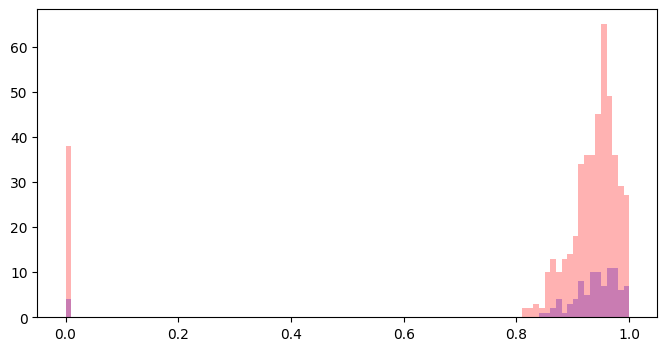

In [233]:
plt.figure(figsize=(8,4))

plt.hist(new_segmentation_ragas_df['answer_relevancy'].to_numpy()[correct_ratio_max], bins=100, color='blue', alpha=0.3)
plt.hist(new_segmentation_ragas_df['answer_relevancy'].fillna(0.0).to_numpy()[~correct_ratio_max], bins=100, color='red', alpha=0.3)

plt.show()

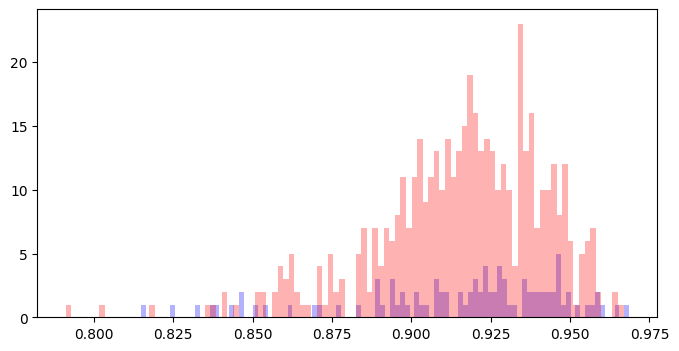

In [234]:
plt.figure(figsize=(8,4))

plt.hist(new_segmentation_ragas_df['semantic_similarity'].to_numpy()[correct_ratio_max], bins=100, color='blue', alpha=0.3)
plt.hist(new_segmentation_ragas_df['semantic_similarity'].fillna(0.0).to_numpy()[~correct_ratio_max], bins=100, color='red', alpha=0.3)

plt.show()

In [199]:
import matplotlib.pyplot as plt

In [202]:
context_matches_new_df.index

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       706, 707, 708, 709, 710, 711, 712, 713, 714, 715],
      dtype='int64', length=577)

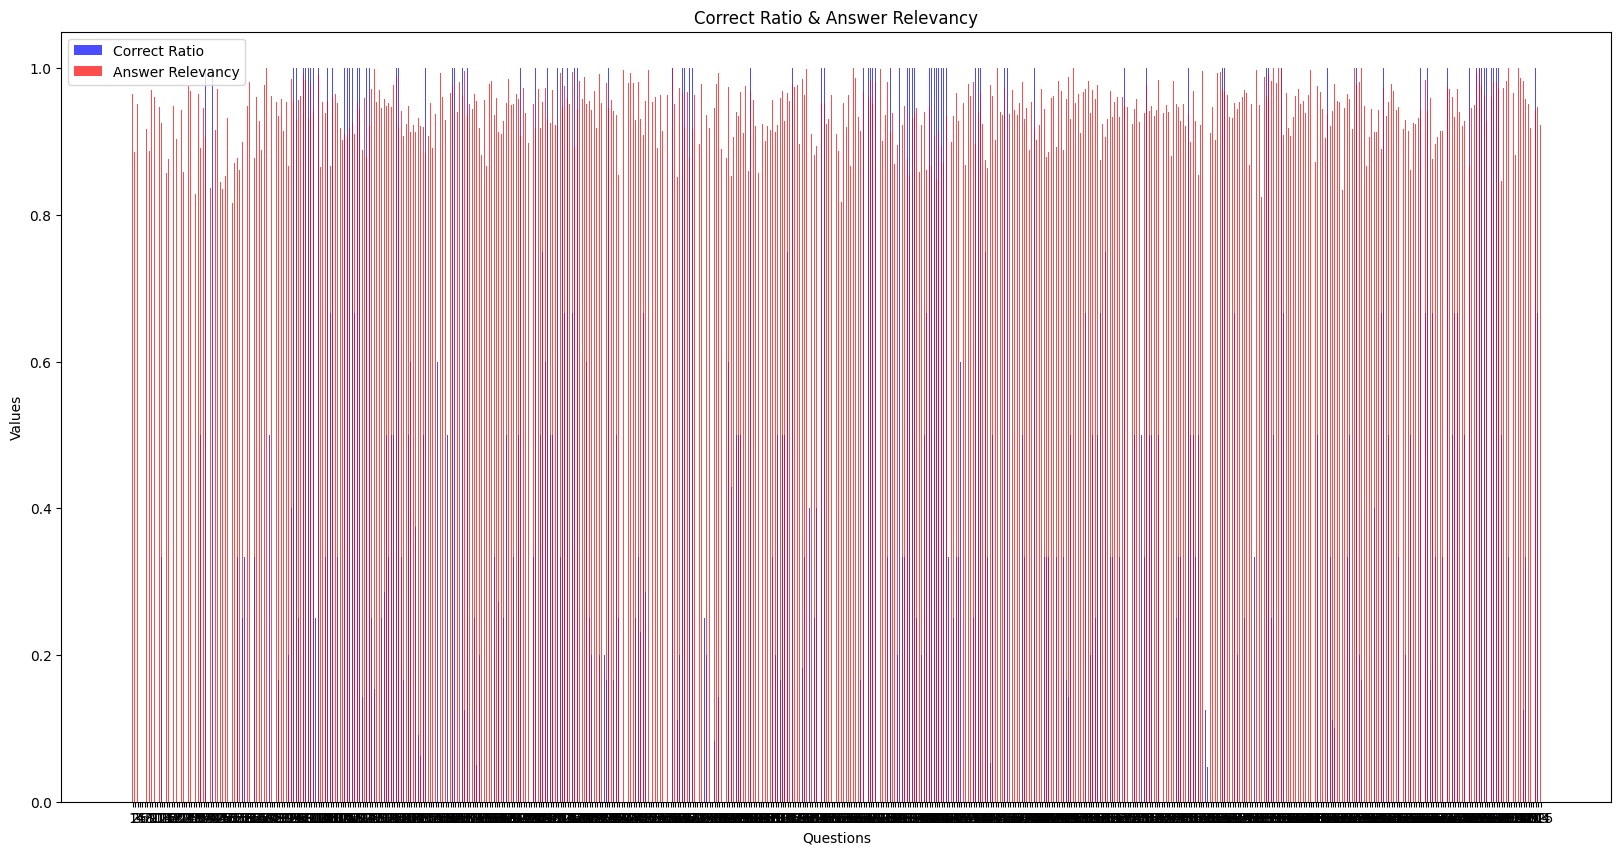

In [203]:
plt.figure(figsize=(20,10))

bar_width = 0.4

x = range(new_segmentation_ragas_df.shape[0])

plt.bar(x, context_matches_new_df['correct_ratio'].clip(upper=1), width=bar_width, label="Correct Ratio", color="blue", alpha=0.7)
plt.bar(x, new_segmentation_ragas_df['answer_relevancy'], width=bar_width, label="Answer Relevancy", color="red", alpha=0.7)

plt.xticks([p + bar_width/2 for p in x], list(context_matches_new_df.index))  # Center labels
plt.xlabel('Questions')
plt.ylabel('Values')
plt.title('Correct Ratio & Answer Relevancy')
plt.legend()

# Show plot
plt.show()